# Torchvision

Torchvision 是一个和 PyTorch 配合使用的 Python 包，包含很多图像处理的工具。

流程：
数据的读取、网络的设计、优化方法与损失函数的选择以及一些辅助的工具等。


In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision

## PyTorch 的数据读取

### DataSet 类

无论使用自定义的数据集，还是官方封装好的数据集，其本质都是继承了 Dataset 类。而在继承 Dataset 类时，至少需要重写以下几个方法：
- `__init__()`：构造函数，可自定义数据读取方法以及进行数据预处理；
- `__len__()`：返回数据集大小；
- `__getitem__()`：索引数据集中的某一个数据。


In [2]:
class MyDataset(Dataset):
    # 构造函数
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor

    # 返回数据集大小
    def __len__(self):
        return self.data_tensor.size(0)

    # 返回索引的数据与标签
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]


在构造函数中，传入 Tensor 类型的数据与标签；在 `__len__` 函数中，直接返回 Tensor 的大小；在 `__getitem__` 函数中返回索引的数据与标签。


In [3]:
# 生成数据
data_tensor = torch.randn(10, 3)
target_tensor = torch.randint(2, (10,))

print(data_tensor)
print(target_tensor)

# 将数据封装成Dataset
my_dataset = MyDataset(data_tensor, target_tensor)

print('Dataset size:', len(my_dataset))
print('tensor_data[0]: ', my_dataset[0])

tensor([[ 1.0453e+00,  1.4465e-01, -1.4328e+00],
        [ 2.1903e-01, -1.1517e+00, -4.3561e-01],
        [ 9.2204e-01, -5.1909e-02, -6.7960e-01],
        [ 1.2780e+00,  3.2946e+00,  1.0316e-01],
        [-9.8177e-01,  1.1520e+00,  6.1899e-01],
        [ 8.0491e-01,  1.2471e+00, -8.5229e-01],
        [ 4.8756e-01, -6.5185e-01, -1.2478e+00],
        [ 6.4517e-02,  1.5442e+00, -4.9421e-01],
        [-2.7993e-02,  2.7816e-03,  1.8373e+00],
        [-9.2791e-02,  1.6297e+00, -4.3148e-01]])
tensor([1, 0, 1, 0, 0, 1, 0, 1, 1, 0])
Dataset size: 10
tensor_data[0]:  (tensor([ 1.0453,  0.1446, -1.4328]), tensor(1))


### DataLoader 类

在实际项目中，如果数据量很大，考虑到内存有限、I/O 速度等问题，在训练过程中不可能一次性的将所有数据全部加载到内存中，也不能只用一个进程去加载，所以就需要多进程、迭代加载，而 DataLoader 就是基于这些需要被设计出来的。DataLoader 是一个迭代器，最基本的使用方法就是传入一个 Dataset 对象，它会根据参数 batch_size 的值生成一个 batch 的数据，节省内存的同时，它还可以实现多进程、数据打乱等处理。

In [4]:
tensor_dataloader = DataLoader(dataset=my_dataset, batch_size=2, shuffle=True, num_workers=0)

for data, target in tensor_dataloader:
    print(data, target)

print('One batch tensor data: ', iter(tensor_dataloader).next())

tensor([[ 1.2780,  3.2946,  0.1032],
        [ 0.2190, -1.1517, -0.4356]]) tensor([0, 0])
tensor([[-0.0280,  0.0028,  1.8373],
        [ 0.0645,  1.5442, -0.4942]]) tensor([1, 1])
tensor([[ 0.8049,  1.2471, -0.8523],
        [-0.9818,  1.1520,  0.6190]]) tensor([1, 0])
tensor([[ 0.9220, -0.0519, -0.6796],
        [ 0.4876, -0.6518, -1.2478]]) tensor([1, 0])
tensor([[-0.0928,  1.6297, -0.4315],
        [ 1.0453,  0.1446, -1.4328]]) tensor([0, 1])
One batch tensor data:  [tensor([[ 0.9220, -0.0519, -0.6796],
        [ 0.2190, -1.1517, -0.4356]]), tensor([1, 0])]


- dataset：Dataset 类型，输入的数据集，必须参数；
- batch_size：int 类型，每个 batch 有多少个样本；
- shuffle：bool 类型，在每个 epoch 开始的时候，是否对数据进行重新打乱；
- num_workers：int 类型，加载数据的进程数，0 意味着所有的数据都会被加载进主进程，默认为 0。

## Torchvision

PyTroch 官方提供了一些常用的图片数据集 —— Torchvision 。
它是一个和 PyTorch 配合使用的 Python 包，集合了常用数据集 + 常见网络模型 + 常用图像处理方法。

参考 [torchvision.datasets 包支持的数据集](https://pytorch.org/vision/stable/datasets.html)

### MNIST 数据集

MNIST 数据集是一个著名的手写数字数据集，上手简单，在深度学习领域，手写数字识别是一个很经典的学习入门样例。

[数据集下载](http://yann.lecun.com/exdb/mnist/)

| 数据集 | 描述 | 字节数 |
|---|---|---|
| train-images-idx3-ubyte.gz | training set images | 9912422 bytes |
| train-labels-idx1-ubyte.gz | training set labels | 28881 bytes |
| t10k-images-idx3-ubyte.gz | test set images | 1648877 bytes |
| t10k-labels-idx1-ubyte.gz | test set labels | 4542 bytes |

数据加载

In [5]:
from torchvision import datasets

In [6]:
# 先去手动解压 ds/MNIST/raw 下的文件，或者直接改 download=True
mnist_dataset = datasets.MNIST(root='./ds', train=True, transform=None, target_transform=None, download=False)

mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./ds
    Split: Train

torchvision.datasets.MNIST 是一个类，对它进行实例化，即可返回一个 MNIST 数据集对象。构造函数包括包含 5 个参数：
- root：用于指定保存 MNIST 数据集的位置。如果 download 是 Flase，则会从目标位置读取数据集；
- download：表示是否下载数据集。 True，则会自动从网上下载这个数据集，存储到 root 指定的位置。如果指定位置已经存在数据集文件，则不会重复下载；
- train：表示是否加载训练集数据。 True ，则只加载训练数据。 False，则只加载测试数据集。这里需要注意，并不是所有的数据集都做了训练集和测试集的划分，这个参数并不一定是有效参数，具体需要参考官方接口说明文档；
- transform：用于对图像进行预处理操作，例如数据增强、归一化、旋转或缩放等；
- target_transform：用于对图像标签进行预处理操作。

没有官方接口的图像数据集，也可以使用以 torchvision.datasets.ImageFolder 接口来自行定义。


数据预览

In [7]:
mnist_dataset_list = list(mnist_dataset)
item = mnist_dataset_list[0]
print(item)
print(type(item))
print(len(item))

(<PIL.Image.Image image mode=L size=28x28 at 0x7FB2F0B2D4C0>, 5)
<class 'tuple'>
2


看到上面的图像数据是 `PIL.Image.Image` 类型的，这种类型可以直接在 Jupyter 中显示出来。

In [8]:
from IPython.display import display

display(item[0])
print("Image label is:", item[1])


Image label is: 5


## 数据变换 torchvision.transforms

神经网络模型接收的数据类型是 Tensor，而不是 PIL 对象，因此还需要对数据进行预处理操作，比如图像格式的转换。

torchvision.transforms 包中提供了常用的图像操作，包括对 Tensor 及 PIL Image 对象的操作，例如随机切割、旋转、数据类型转换等等。

### 数据类型转换

将 PIL.Image 或 Numpy.ndarray 格式的数据转化为 Tensor 格式，使用 `transforms.ToTensor() 类`。将 Tensor 或 Numpy.ndarray 格式的数据转化为 PIL.Image 格式，使用 `transforms.ToPILImage(mode=None) 类`。

参数 mode 代表 PIL.Image 的模式，如果 mode 为 None（默认值），则根据输入数据的维度进行推断：
- 3 通道：mode 为’RGB’；
- 4 通道：mode 为’RGBA’；
- 2 通道：mode 为’LA’;
- 单通道：mode 根据输入数据的类型确定具体模式。

In [9]:
from PIL import Image
from torchvision import transforms
from torchvision.transforms import InterpolationMode

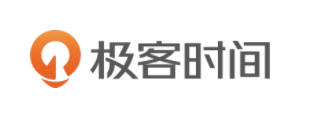

<class 'PIL.WebPImagePlugin.WebPImageFile'>


In [10]:
img = Image.open('../res/images/geektime.webp')
display(img)
print(type(img))

In [11]:
# PIL.Image to Tensor

img1 = transforms.ToTensor()(img)

print(type(img1))

<class 'torch.Tensor'>


<class 'PIL.Image.Image'>


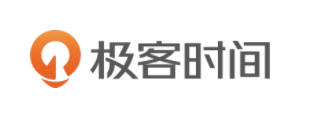

In [12]:
# Tensor to PIL.Image

img2 = transforms.ToPILImage()(img1)
print(type(img2))

display(img2)

### PIL.Image 的变换

这里的 变换 就是英文 transform 。

`torchvision.transforms.Resize(size, interpolation=2)`

- size：期望输出的尺寸。如果 size 是一个这样的元组 (h, w) ，则图像输出尺寸将与之匹配。如果 size 是一个 int 类型的整数，图像较小的边将被匹配到该整数，另一条边按比例缩放。
- interpolation：插值算法，int 类型，默认为 2，表示 PIL.Image.BILINEAR 。

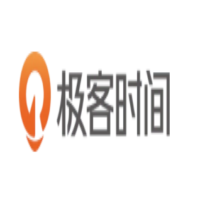

In [13]:
resize_img_oper = transforms.Resize((200, 200), interpolation=InterpolationMode.BILINEAR)

resized_img = resize_img_oper(img)
display(resized_img)

**剪裁**

- 中心剪裁

   torchvision.transforms 提供了多种剪裁方法，例如中心剪裁、随机剪裁、四角和中心剪裁等。

- 随机剪裁

   torchvision.transforms.RandomCrop(size, padding=None)

- 从四角和中心进行剪裁 FiveCrop

   torchvision.transforms.FiveCrop(size)

center corp


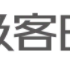

random corp


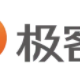

five corp and center corp


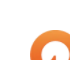

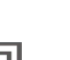

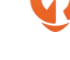

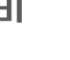

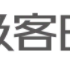

In [14]:
center_corp_oper = transforms.CenterCrop((60, 70))
random_corp_oper = transforms.RandomCrop((80,80))
five_corp_oper = transforms.FiveCrop((60,70))

print('center corp')
center_img = center_corp_oper(img)
display(center_img)

print('random corp')
random_img = random_corp_oper(img)
display(random_img)

print('five corp and center corp')
five_corp_imgs = five_corp_oper(img)
for ig in five_corp_imgs:
    display(ig)


**翻转**

- 水平翻转图像

   torchvision.transforms.RandomHorizontalFlip(p=0.5)

- 垂直翻转图像

   torchvision.transforms.RandomVerticalFlip(p=0.5)

p 表示随机翻转的概率值，默认为 0.5。

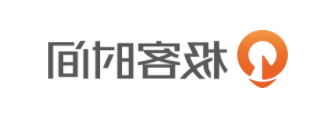

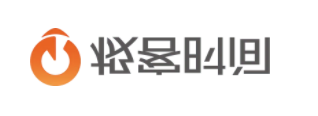

In [15]:
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

h_img = h_flip_oper(img)
display(h_img)

v_img = v_flip_oper(img)
display(v_img)

### Tensor 的变换

只针对 Tensor 的变换操作只有 4 个： LinearTransformation（线性变换）、Normalize（标准化）、RandomErasing（随机擦除）、ConvertImageDtype（格式转换）。

标准化标准化是指每一个数据点减去所在通道的平均值，再除以所在通道的标准差，数学的计算公式如下：

output=(input−mean)/std

对图像进行标准化，就是对图像的每个通道利用均值和标准差进行正则化。这样做的目的，是为了保证数据集中所有的图像分布都相似，这样在训练的时候更容易收敛，既加快了训练速度，也提高了训练效果。

标准化是一个常规做法，可以理解为无脑进行标准化后再训练的效果，大概率要好于不进行标准化。为什么？因为，标准化后会将数据映射到同一区间中，一个类别的图片虽说有的像素值可能有差异，但是它们分布都是类似的分布。


对 Tensor 进行标准化的函数 `torchvision.transforms.Normalize(mean, std, inplace=False)`

参数的含义：
- mean：表示各通道的均值；
- std：表示各通道的标准差；
- inplace：表示是否原地操作，默认为否。

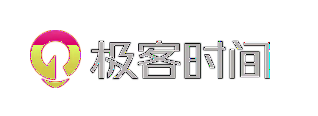

In [16]:
norm_oper = transforms.Normalize(mean=(0.5,.5,.5), std=(.5,.5,.5))

img_tensor = transforms.ToTensor()(img)

tensor_norm = norm_oper(img_tensor)

img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

transforms 的组合

Compose 类是将多个变换组合到一起，定义`torchvision.transforms.Compose(transforms)`。其中，transforms 是一个 Transform 对象的列表，表示要组合的变换列表。

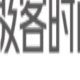

In [17]:
composed = transforms.Compose([transforms.Resize((200,200)),transforms.RandomCrop(80)])

img_composed = composed(img)
display(img_composed)

结合 datasets

In [18]:
my_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (.5))])

mnist_dataset = torchvision.datasets.MNIST(root='./ds',
                                           train=False,
                                           transform=my_transform,
                                           target_transform=None,
                                           download=False)

item = mnist_dataset.__getitem__(0)
print(type(item[0]))

<class 'torch.Tensor'>


## 常见网络模型

Torchvision 中的各种经典网络结构以及训练好的模型，都放在了torchvision.models模块中。
随着深度学习技术的不断发展，人工智能应用更为广泛，torchvision.models 模块中所封装的网络模型也在不断丰富。新增了图像语义分割、物体检测和视频分类的相关网络，并且在图像分类中也新增了 GoogLeNet、ShuffleNet 以及可以使用于移动端的 MobileNet 系列。

- 图像分类 classification

   图像分类，指的是单纯把一张图片判断为某一类

- 图像分割 segmentation

   分割即是对图像中每一个像素点进行分类，确定每个点的类别，从而进行区域划分。

- 物体检测 detection 

   目标检测则是说，首先检测出物体的位置，还要识别出对应物体的类别。

- 视频分类


In [19]:
import torchvision.models as models


GoogLeNet 是 Google 推出的基于 Inception 模块的深度神经网络模型。

In [20]:
# 随机初始化的权重，创建一个 GoogLeNet 模型
googlenet = models.googlenet(init_weights=True)

In [21]:
# 直接导入训练好的模型来使用

from torchvision.models import GoogLeNet_Weights

googlenet = models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

### 模型微调 fine-tuning

什么是“fine-tuning”呢？

举个例子，

假设老板布置了一个有关于图片分类的任务，数据集是关于狗狗的图片，需要区分图片中狗的种类，例如金毛、柯基、边牧等等。
问题是数据集中狗的类别很多，但数据却不多。从零开始训练一个图片分类模型，这样模型效果很差，并且很容易过拟合。这时就需要使用迁移学习，可以用已经在 ImageNet 数据集上训练好的模型来达成目标。
比如，使用 GoogLeNet 模型，然后使用自己的数据集，重新训练网络最后的分类层，即可得到区分狗种类的图片分类模型。这就是所谓的“fine-tuning”方法。

简单来说，模型微调就是先在一个比较通用、宽泛的数据集上进行大量训练得出了一套参数，然后再使用这套预训练好的网络和参数，在自己的任务和数据集上进行训练。使用经过预训练的模型，要比使用随机初始化的模型训练效果更好，更容易收敛，并且训练速度更快，在小数据集上也能取得比较理想的效果。


In [22]:
# 加载预训练模型
googlenet = models.googlenet(weights=GoogLeNet_Weights.DEFAULT)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print('fc_in_features:', fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print('fc_out_features:', fc_out_features)

# 修改预训练模型的输出分类数
googlenet.fc = torch.nn.Linear(fc_in_features, 10)

fc_in_features: 1024
fc_out_features: 1000


### 其他常用函数

**make_grid**

将若干幅图像拼成在一个网格中，它的定义 `torchvision.utils.make_grid(tensor, nrow=8, padding=2)`

几个参数：
- tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，其形状应是 (B x C x H x W)；如果输入类型是列表，列表中元素应为相同大小的图片。
- nrow：表示一行放入的图片数量，默认为 8。
- padding：子图像与子图像之间的边框宽度，默认为 2 像素。

这个函数主要用于展示数据集或模型输出的图像结果。

下面代码示例：首先利用 torchvision.datasets 加载 MNIST 的测试集，然后利用 DataLoader 类的迭代器一次获取到 32 张图片的 Tensor，最后利用 make_grid 函数将 32 张图片拼接在了一幅图片中。

torch.Size([32, 1, 28, 28])


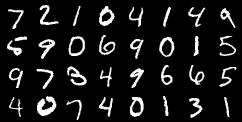

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])


In [23]:
mnist_dataset = datasets.MNIST(root='./ds',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=False)

# 取 32 张图片的 tensor
tensor_loader = DataLoader(dataset=mnist_dataset, batch_size=32)
data_iter = iter(tensor_loader)
img_tensor, label_tensor = data_iter.next()
# 32 行 1 列，28 * 28 像素
print(img_tensor.shape)

grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)
print(label_tensor)

**save_img**

这个函数能够直接将 Tensor 保存为图片，即使 Tensor 数据在 `CUDA` 上，也会自动移到 CPU 中进行保存。

>CUDA ？

函数定义 `torchvision.utils.save_image(tensor, fp, **kwargs)`。参数：
- tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，直接将 Tensor 保存；如果输入类型是列表，则先调用 make_grid 函数生成一张图片的 Tensor，然后再保存。
- fp：保存图片的文件名；
- **kwargs：make_grid 函数中的参数。

In [24]:
# 直接保存
torchvision.utils.save_image(grid_tensor, 'grid-tensor.jpg')
print(grid_tensor.shape)

# 输入为一列数据，先调用 make_grid 后保存
# 每行中有 5 个数字，最后一行不足的数字，已经自动填充了空图像
torchvision.utils.save_image(img_tensor, 'img-tensor.jpg', nrow=5, padding=2)
print(img_tensor.shape)

torch.Size([3, 122, 242])
torch.Size([32, 1, 28, 28])


思考：

使用 torchvision.models 模块实例化一个 VGG 16 网络。

In [25]:
from torchvision.models import VGG16_Weights

vgg16 = models.vgg16(weights=VGG16_Weights.DEFAULT)